## Importing Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Set the style for plots
plt.style.use('ggplot')

## Data Loading

In [2]:
# Step 1: Loading the Customer NewCustomerList Data
new_cust = pd.read_excel('Raw_data.xlsx', sheet_name='NewCustomerList')

In [3]:
# Display the first few rows of the dataset
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.01,1.2625,1.578125,1.341406,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.79,0.7900,0.987500,0.839375,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.60,0.6000,0.600000,0.600000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.42,0.5250,0.525000,0.525000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.10,1.1000,1.375000,1.375000,4,4,1.703125


In [4]:
# Step 2: Exploring the dataset information
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [5]:
# Convert the 'DOB' column to datetime format
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'])


In [6]:
# Step : Exploring the dataset information
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

The data types of the feature columns are fine. However, the columns labeled 'Unnamed:16', 'Unnamed:17', 'Unnamed:18', 'Unnamed:19', and 'Unnamed:20' are irrelevant and should be dropped from the dataset.

## Total Records

In [8]:
# Step 3: Displaying total records and columns
print(f"Total records: {new_cust.shape[0]}")
print(f"Total columns: {new_cust.shape[1]}")

Total records: 1000
Total columns: 23


## Numeric Columns and Non-Numeric Columns

In [9]:
# Step 4: Identifying numeric and non-numeric columns
df_numeric = new_cust.select_dtypes(include=[np.number])
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
print(f"Numeric columns: {df_numeric.columns.values}")
print(f"Non-numeric columns: {df_non_numeric.columns.values}")

Numeric columns: ['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
Non-numeric columns: ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


## 1. Dropping Irrelevant Columns

The columns labeled 'Unnamed:16', 'Unnamed:17', 'Unnamed:18', 'Unnamed:19', and 'Unnamed:20' are irrelevant and should be dropped from the dataset.

In [10]:
# Dropping irrelevant columns from the New Customer Data
new_cust.drop(labels=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)


## 2. Missing Values Check

We will check for the presence of any missing values in the dataset. If missing values are present for a particular feature, then depending on the situation, the feature may be either dropped (in cases where a significant amount of data is missing) or an appropriate value will be imputed in the feature column with missing values.

In [12]:
# Step 5: Checking for missing values
print("Missing values in each column:")
print(new_cust.isnull().sum())

Missing values in each column:
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64


In [13]:
# Percentage of missing values
print("Percentage of missing values in each column:\n", new_cust.isnull().mean() * 100)

Percentage of missing values in each column:
 first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64


## 2.1 Last Name

Since all customers have a first name, each customer is identifiable. Therefore, it is acceptable for some customers to not have a last name. We will fill null values in the last name column with 'None'.

In [15]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [16]:
new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value


In [17]:
new_cust['last_name'].fillna('None', axis=0, inplace=True)

In [15]:
new_cust['last_name'].isnull().sum()

np.int64(0)

Currently, there are no missing values in the Last Name column.

## 2.2 Date of Birth

In [18]:
# Count the number of records with missing values in the 'DOB' column
missing_dob_count = new_cust['DOB'].isnull().sum()
print(f"Number of records with missing DOB: {missing_dob_count}")


Number of records with missing DOB: 17


In [20]:
# Calculate the percentage of missing values in the 'DOB' column
round(new_cust['DOB'].isnull().mean() * 100)

2

Since less than 5% of the data has a null value for the Date of Birth (DOB) column, we can remove the records where the DOB is null.

In [22]:
# Identify the indices of records where the 'DOB' column has null values
dob_index_drop = new_cust[new_cust['DOB'].isnull()].index

# Print the indices of records with null DOB
print(dob_index_drop)


Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')


In [23]:
# Drop records from the DataFrame 'cust_demo' using the indices identified for null 'DOB' values
new_cust.drop(index=dob_index_drop, inplace=True, axis=0)

In [24]:
# Count the number of null values in the 'DOB' column of the cust_demo DataFrame
new_cust['DOB'].isnull().sum()

np.int64(0)

Currently, there are no missing values in the DOB column.

## Creating Age Column to Check for Further Discrepancies in Data.


In [25]:
# Creating Age Column
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cust['Age'] = new_cust['DOB'].apply(age)
    

## Descriptive Statistics of Age Column

In [26]:
# Displaying summary statistics for the Age column
new_cust['Age'].describe()

count    983.000000
mean      52.950153
std       17.078308
min       22.000000
25%       41.000000
50%       52.000000
75%       66.500000
max       86.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

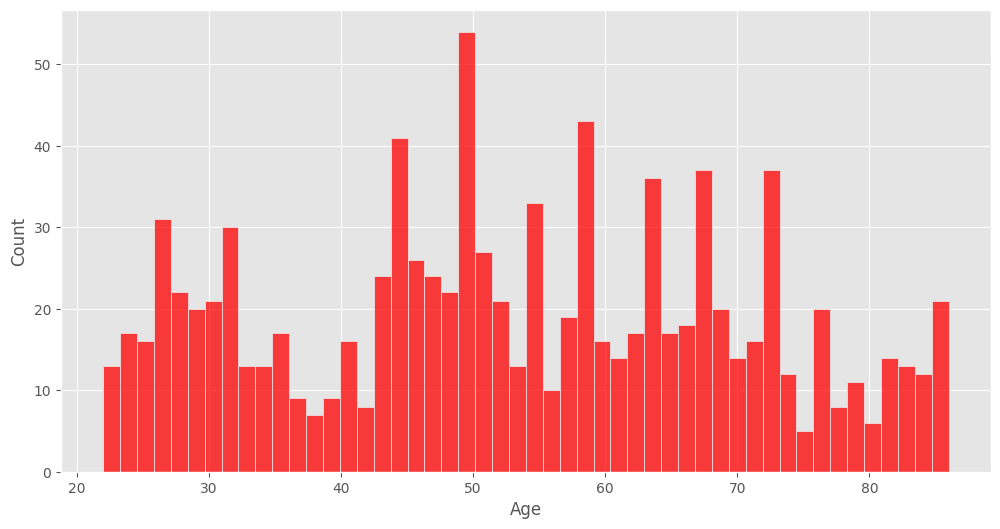

In [28]:
# Viz to find out the age distribution
plt.figure(figsize=(12, 6))
sns.histplot(new_cust['Age'], bins=50, kde=False, color='red')

Looking at the age field there is no discrepancies  in the data.

## Creating Age Group Column

In [30]:
# Creating Age Group
new_cust['Age_Group'] = new_cust['Age'].apply(lambda x: (math.floor(x / 10) + 1) * 10)

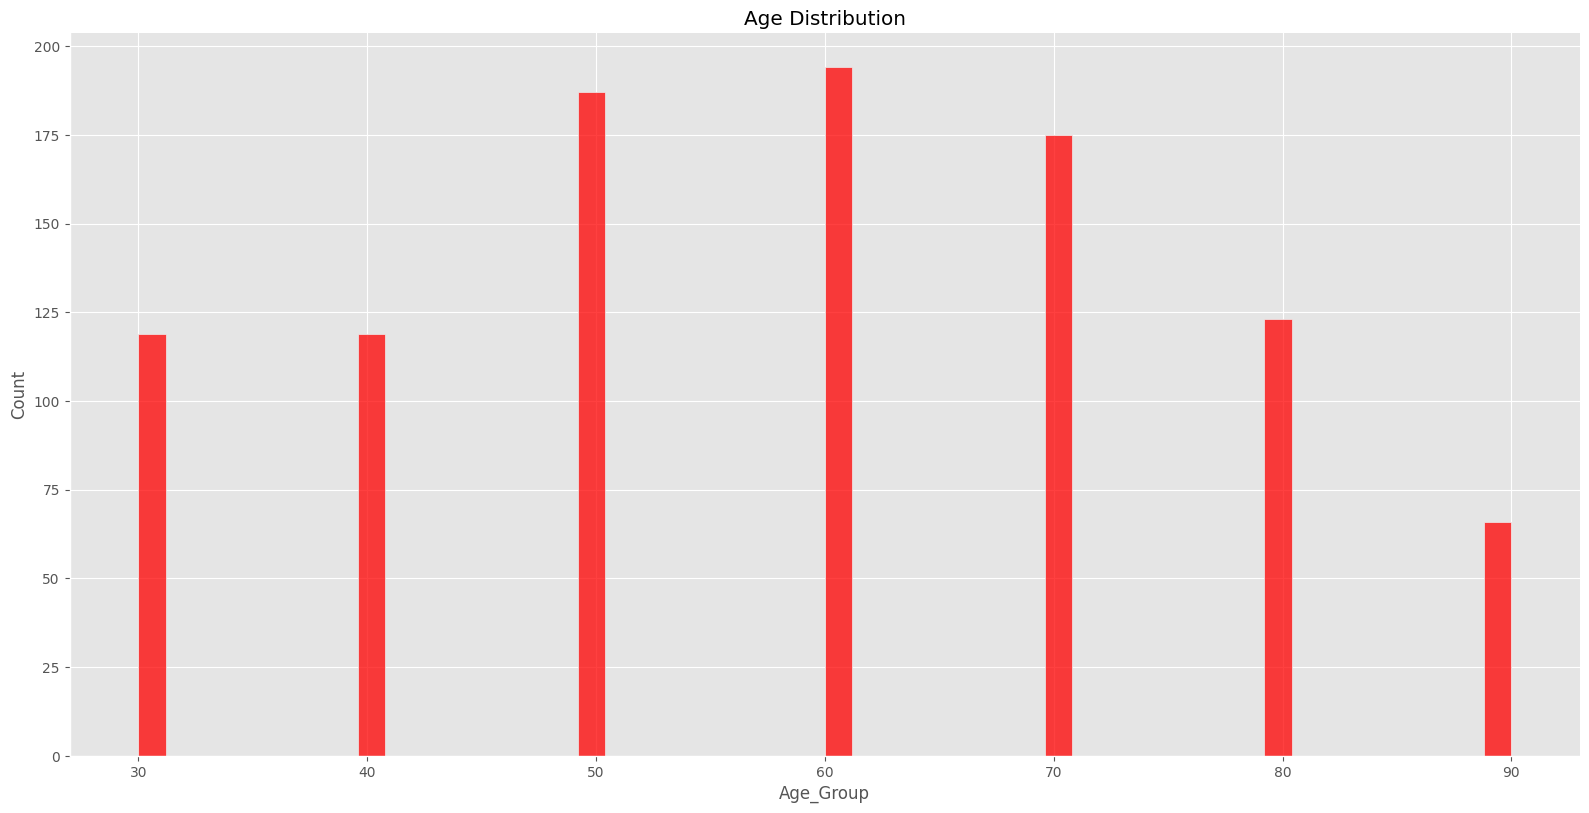

In [32]:
# Viz to find out the age Distribution
sns.displot(new_cust['Age_Group'], kde=False, bins=50, height=8, aspect=2, color='red')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

The Highest number of New Customers are from Age Group 50-59.

## 2.3 Job Title

In [28]:
new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,70,80
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,79,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,64,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,44,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,45,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,47,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,62,70
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,25,30
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,26,30


Since Percentage of missing values for job Title is 11% We will replace null values with missing.

In [29]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)

In [30]:
new_cust['job_title'].isnull().sum()

np.int64(0)

Currently there are no missing values for job title column.

## 2.4 Job Industry Category

In [31]:
new_cust[new_cust['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,26,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,47,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,43,50
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,56,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,58,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,57,60
971,Frieda,Tavinor,Female,43,1999-03-04,Missing,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,25,30
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,56,60
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,32,40


Since Percentage of missing Job Industry Category is 16% We will replaces null values with Missing

In [32]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [33]:
new_cust['job_industry_category'].isnull().sum()

np.int64(0)

Currently there are no missing values for Job Industry Category column.

# Finally there are no Missing Values in the dataset.

In [34]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age_Group                              0
dtype: int64

In [35]:
print('Total rocords after removing Missing Values : {}'.format(new_cust.shape[0]))

Total rocords after removing Missing Values : 983


## 3. Inconsistency Check in Data

We will check whether there is inconsistent data or type error data present in the categorical columns. The columns to be checked are 'gender', 'wealth_segment', 'deceased_indicator', and 'owns_car'.

## 3.1 Gender

There is no inconsistent data in the gender column.

In [36]:
new_cust['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

## 3.2 Wealth Segment

There is no inconsistent data in the  Wealth Segment column.

In [37]:
new_cust['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

# 3.3 Deceased Indicator

There is no inconsistent data in Deceased Indicator column.

In [38]:
new_cust['deceased_indicator'].value_counts()

deceased_indicator
N    983
Name: count, dtype: int64

# 3.4 Owns Car

There is no inconsistent data in Owns Car columns.

In [39]:
new_cust['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

## 3.5 State

There is no inconsistent data in State column.

In [40]:
new_cust['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

## 3.6 Country

There is no inconsistent data in Country column.

In [41]:
new_cust['country'].value_counts()

country
Australia    983
Name: count, dtype: int64

## 3.7 Postcode

There is no inconsistent data in Postcode column.

In [43]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


## 3.8 Address

There is no inconsistent data in address column.

In [44]:
new_cust[['address', 'postcode', 'state', 'country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


## Tenure

There is no inconsistent data in tenure column.

In [35]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

<Figure size 1500x800 with 0 Axes>

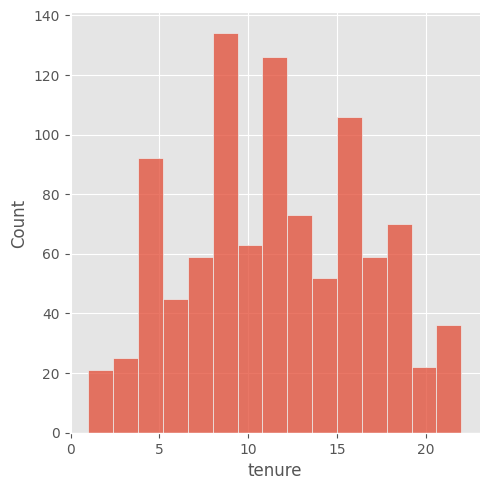

In [37]:
# Distributon of tenure

plt.figure(figsize=(15, 8))
sns.displot(new_cust['tenure'])

## 4. Duplication Checks

We need to ensure that there are no duplicate records in the dataset, as this may lead to errors in data analysis due to poor data quality. If there are duplicate rows of data, we need to drop such records. To check for duplicate records, we should first remove the primary key column from the dataset and then apply the drop_duplicates() function provided by Python.

In [39]:
new_cust_dedupped = new_cust.drop_duplicates()

print('Number of records after removing customer_id (pk), duplicates : {}'.format(new_cust_dedupped.shape[0]))
print('Number of records in original dataset : {}'.format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


Since both the number are same. There are no duplicate records in the dataset.

# Exporting the Cleaned New Customers Data Set to csv

In [50]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)